# Kreditech Datascience
*rob brown*

In [1]:
# standards + plotting
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import ImageGrid

# models
import xgboost as xgb
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn import preprocessing

train_path = 'data/Training.csv'
validation_path = 'data/Validation.csv'

import warnings
%matplotlib inline
sns.set(style='white', context='notebook', palette='bright')
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv(train_path, delimiter=';')
validation = pd.read_csv(validation_path, delimiter=';')

In [3]:
train.head(15)

,v33,v76,v12,v68,v50,v7,v70,v55,v20,v24,...,v28,v99,v95,v42,v53,v85,v9,v84,v44,classlabel
0,v,g,17.92,f,1.750,a,t,80.0,0.000054,1,...,t,c,t,800000.0,5,g,0,f,f,no.
1,v,s,16.92,f,0.290,b,f,200.0,0.000034,0,...,f,k,NaN,2000000.0,0,p,1,f,f,no.
2,ff,g,31.25,f,0.000,b,t,96.0,0.000112,1,...,f,ff,t,960000.0,19,g,0,f,f,no.
3,o,g,48.17,f,0.335,a,f,0.0,0.000133,0,...,f,i,NaN,0.0,120,g,1,f,f,no.
4,v,g,32.33,t,0.500,b,f,232.0,0.000350,0,...,t,k,f,2320000.0,0,g,1,f,f,no.
5,h,g,34.83,f,0.500,a,f,160.0,0.000125,0,...,t,i,f,1600000.0,0,p,0,f,f,no.
6,j,g,26.17,t,0.000,a,f,276.0,0.000200,0,...,t,j,NaN,2760000.0,1,g,1,f,f,no.
7,h,g,21.17,f,0.250,b,f,280.0,0.000087,0,...,f,c,NaN,2800000.0,204,p,1,f,f,no.
8,v,g,28.92,f,0.290,b,f,220.0,0.000037,0,...,f,c,NaN,2200000.0,140,g,0,f,f,no.
9,h,g,18.17,f,1.085,b,f,320.0,0.001025,0,...,f,c,NaN,3200000.0,13,g,0,f,f,no.


In [4]:
print train.isnull().sum()
train.describe()

v33             66
v76              0
v12             39
v68              0
v50              0
v7              39
v70              0
v55            100
v20              0
v24              0
v32             64
v97              0
v28              0
v99             66
v95           2145
v42            100
v53              0
v85             64
v9               0
v84              0
v44              0
classlabel       0
dtype: int64


,v12,v50,v55,v20,v24,v97,v42,v53,v9
count,3661.000000,3700.000000,3600.000000,3700.000000,3700.000000,3700.000000,3.600000e+03,3700.000000,3700.000000
mean,32.820713,3.439496,162.695000,0.000585,4.160000,3.321473,1.626950e+06,2246.705946,0.495676
std,12.666181,4.335229,156.045682,0.000540,6.750553,1.009448,1.560457e+06,8708.571126,0.500049
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,23.000000,0.500000,0.000000,0.000150,0.000000,2.630000,0.000000e+00,0.000000,0.000000
50%,28.670000,1.750000,120.000000,0.000425,2.000000,3.320000,1.200000e+06,113.000000,0.000000
75%,40.830000,5.000000,280.000000,0.000963,6.000000,4.000000,2.800000e+06,1059.750000,1.000000
max,80.250000,28.500000,1160.000000,0.002800,67.000000,6.620000,1.160000e+07,100000.000000,1.000000


In [5]:
print validation.isnull().sum()
validation.describe()

v33             3
v76             0
v12             3
v68             0
v50             0
v7              3
v70             0
v55             3
v20             0
v24             0
v32             2
v97             0
v28             0
v99             3
v95           111
v42             3
v53             0
v85             2
v9              0
v84             0
v44             0
classlabel      0
dtype: int64


,v12,v50,v55,v20,v24,v97,v42,v53,v9
count,197.000000,200.000000,197.000000,200.000000,200.000000,200.000000,1.970000e+02,200.000000,200.000000
mean,32.083198,2.036825,199.903553,0.000460,2.795000,3.340900,1.999036e+06,659.720000,0.555000
std,12.209125,2.739335,209.373399,0.000494,4.233508,0.951484,2.093734e+06,1603.900294,0.498213
min,15.920000,0.000000,0.000000,0.000000,0.000000,0.370000,0.000000e+00,0.000000,0.000000
25%,22.670000,0.250000,80.000000,0.000078,0.000000,2.740000,8.000000e+05,0.000000,0.000000
50%,29.670000,1.042500,160.000000,0.000260,0.000000,3.355000,1.600000e+06,4.500000,1.000000
75%,39.080000,2.656250,280.000000,0.000750,5.000000,3.842500,2.800000e+06,500.000000,1.000000
max,76.750000,20.000000,2000.000000,0.002508,20.000000,6.270000,2.000000e+07,10000.000000,1.000000


** v95 should be avoided as a feature **

## Initial Reactions:

train and validation datasets are sampled quiet differently. Very low representation of 'no.' class label in training data. We are tasked with predicting very uncommonly occuring events... 

[related quora](https://www.quora.com/How-do-I-improve-machine-learning-prediction-rates-for-rare-events)

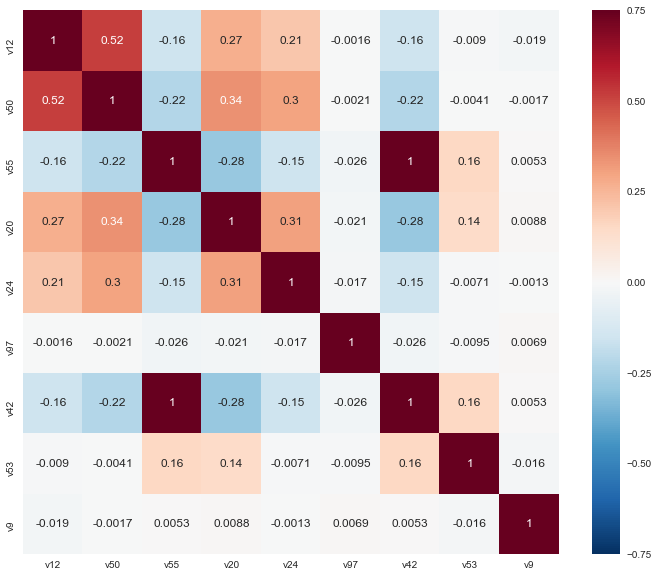

In [6]:
f, ax = plt.subplots(figsize=(12, 10))
heat = sns.heatmap(train.corr(), vmax=0.75, square=False, annot = True, ax=ax)

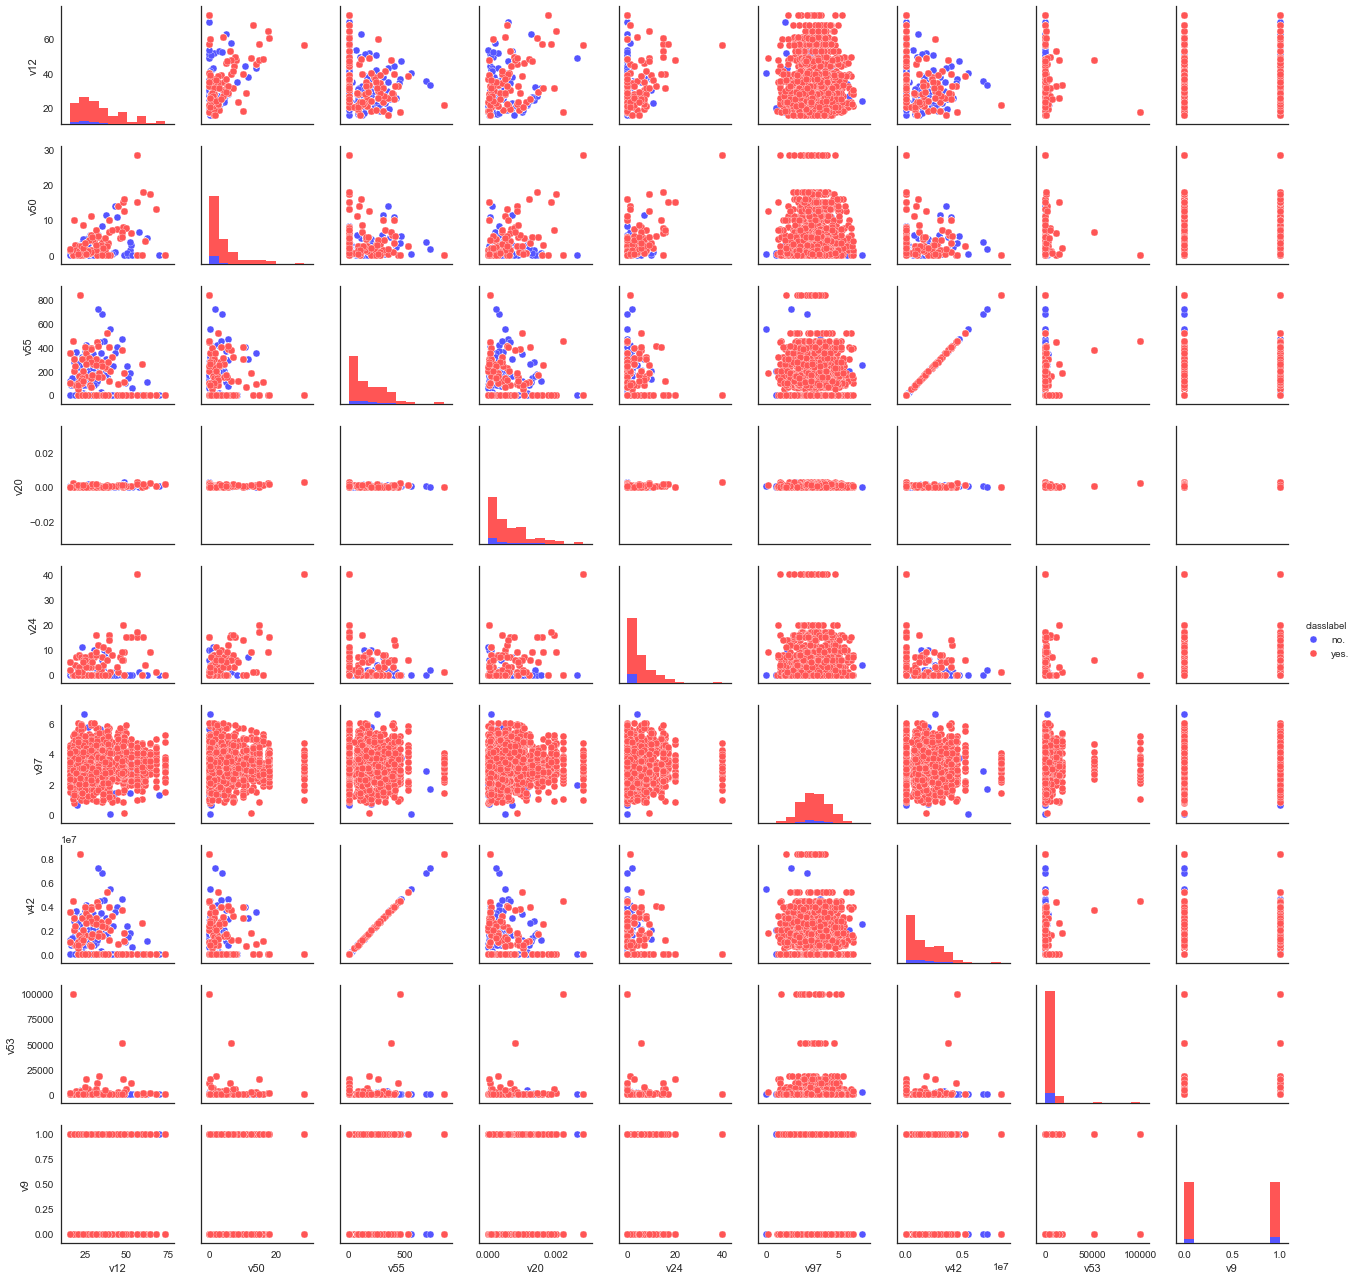

In [7]:
g = sns.pairplot(data=train.dropna(), size=2, hue='classlabel', palette='seismic')

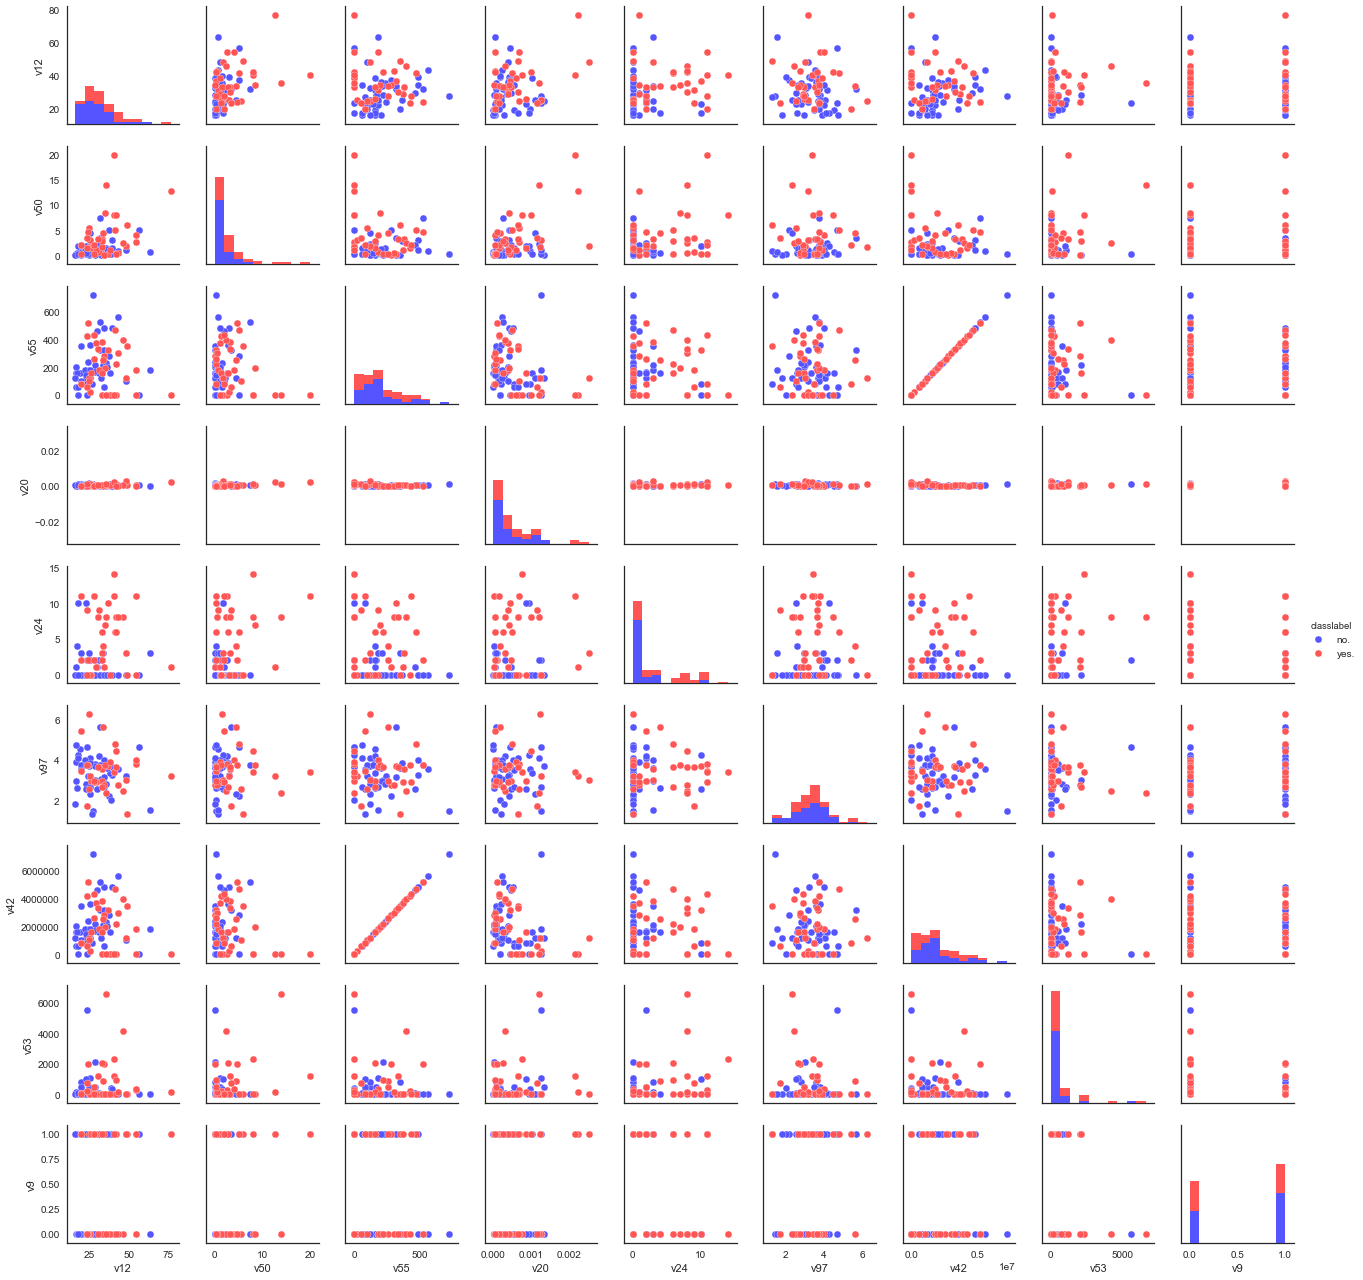

In [8]:
g = sns.pairplot(data=validation.dropna(), size=2, hue='classlabel', palette='seismic')

In [9]:
catagorical_fields = ['v33', 'v76', 'v68', 'v7', 'v70', 'v28', 'v99', 'v95', 'v85', 'v84', 'v44', 'classlabel']
for df in [train, validation]:
    for field in catagorical_fields:
        df[field] = df[field].astype('category')

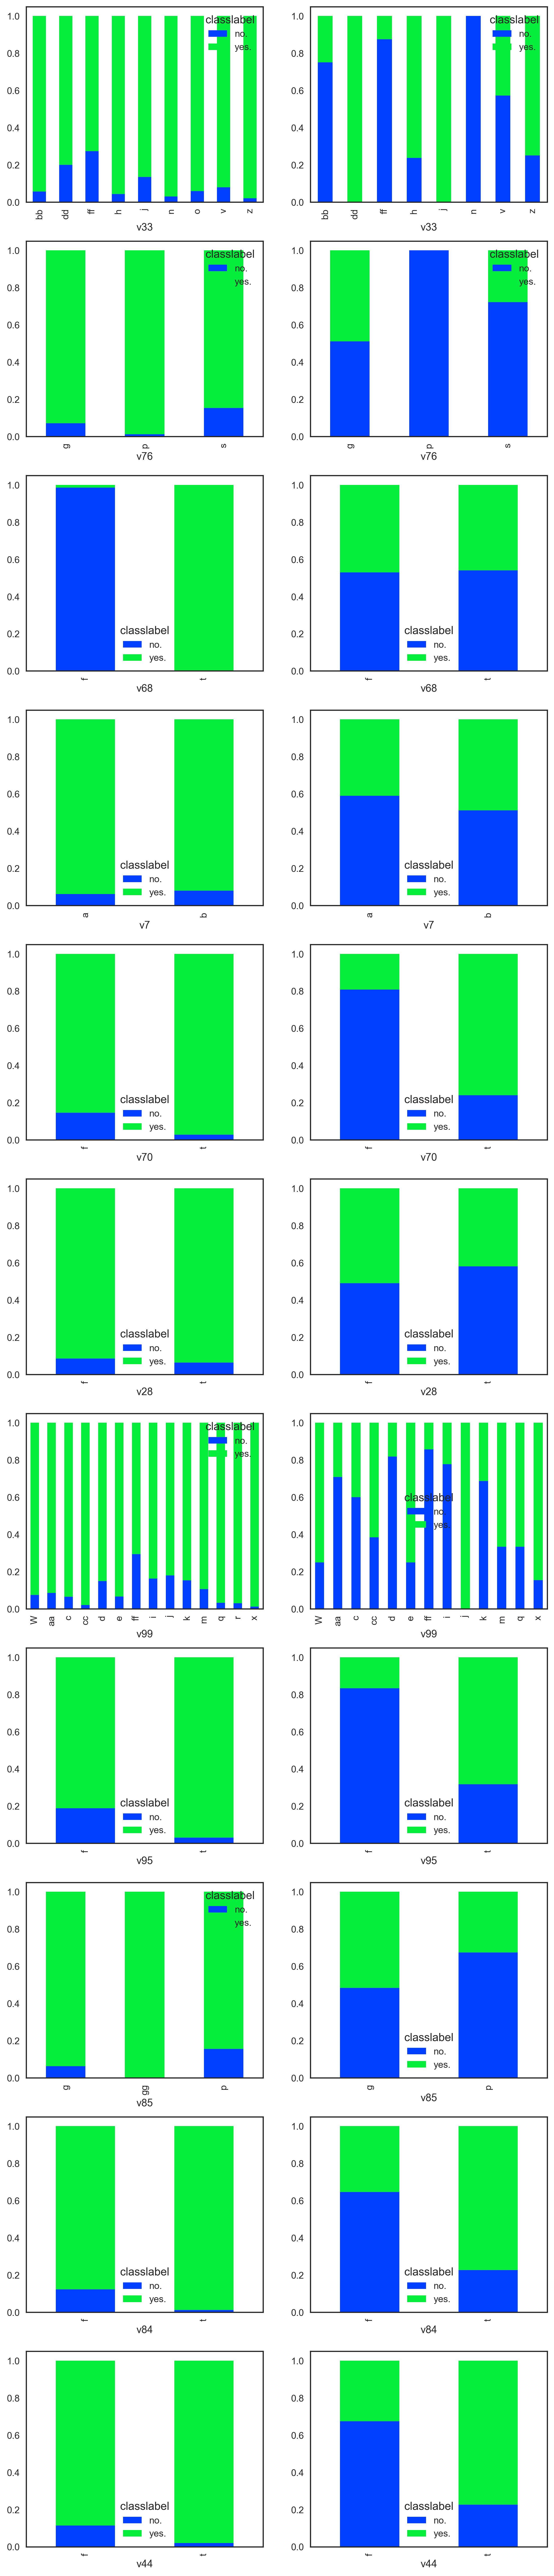

In [10]:
rows = len(catagorical_fields) - 1
cols = 2
fig, ax = plt.subplots(num=None, figsize=(10, 50), dpi=300, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(rows, cols)
ax = [plt.subplot(gs[i]) for i in range(rows*cols)]

for i, f in enumerate(catagorical_fields):
    if f == 'classlabel': continue
    tab = pd.crosstab(train[f], train['classlabel'])
    dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[2*i])
    
    tab = pd.crosstab(validation[f], validation['classlabel'])
    dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[2*i+1])

v68 is an incredibly powerful predictor 

future me: **WRONG.** v68 takes XGB from 70% validation testset classification to 45... hm. ie: v68 is essentially inversely distributed in the two samples. 
            
Would love to see these histograms side-by-side for the training and validation sets. But time says no. 

**update** Just kiddng, time says yes.

In [11]:
features = ['v12', 'v20', 'v24', 'v42', 'v44', 'v50', 'v55', 'v84', 'v99'] 
t_features = np.append(['classlabel'], features)

normalizer = preprocessing.MinMaxScaler()

training_df = pd.get_dummies(train.loc[:,features].dropna())
trian_norm = normalizer.fit_transform(training_df)  
training_df = pd.DataFrame(trian_norm, columns=list(training_df))

validation_df = pd.get_dummies(validation.loc[:,features].dropna())
validation_norm = normalizer.fit_transform(validation_df)  
validation_df = pd.DataFrame(validation_norm, columns=list(validation_df))

features = list(set(training_df).intersection(validation_df))

X = training_df[features]
y = train[t_features].dropna().classlabel.apply(lambda v: v == 'yes.').astype('int').as_matrix()
X_validation = validation_df[features]
y_validation = validation[t_features].dropna().classlabel.apply(lambda v: v == 'yes.').astype('int').as_matrix()

In [12]:
print X.shape, y.shape
print X_validation.shape, y_validation.shape

(3560, 23) (3560,)
(193, 23) (193,)


# Model Building

In [13]:
M = {}

In [14]:
sklearn_GBS_params = {  
        'n_estimators':1000,
        'learning_rate':0.1,
        'max_depth':3,
        'subsample':0.75,
        'random_state':0 }

forest_params = {
        'n_estimators':1000,
        'max_depth':None, 
        'min_samples_split':10,
        'class_weight':"balanced", 
        'min_weight_fraction_leaf':0.02 }    

XGB_params = {
        'max_depth':5,
        'n_estimators':500,
        'subsample':.5,
        'learning_rate':0.1 }

In [15]:
M['Logistic Regression'] = LogisticRegression()
M['Perceptron'] = Perceptron(class_weight='balanced')
M['SVM'] = svm.SVC(class_weight='balanced', kernel='sigmoid')
M['KNN'] = KNeighborsClassifier(n_neighbors=10, weights='distance')
M['Decision Tree'] = tree.DecisionTreeClassifier(max_depth=5, class_weight="balanced", min_weight_fraction_leaf=0.01)
M['Gradient Boosting'] = GradientBoostingClassifier(**sklearn_GBS_params)
M['XGBoost'] = xgb.XGBClassifier(**XGB_params)
M['Random Forest'] = RandomForestClassifier(**forest_params)

In [16]:
classifiers = [(m, M[m]) for m in ['XGBoost', 'Gradient Boosting', 'Decision Tree', 'Random Forest']]
M['Ensemble'] = VotingClassifier(estimators=classifiers, voting='soft')

## Summary of Models

In [18]:
map(lambda m: m.fit(X, y), M.values()) # fit all models

models = pd.DataFrame({ 'Model':list(M),
                        'Training Score':map(lambda m: m.score(X, y), M.values()),
                        'Validation Score':map(lambda m: m.score(X_validation, y_validation), M.values())
                        })

models.sort_values(by='Validation Score', ascending=False)

,Model,Training Score,Validation Score
7,Perceptron,0.771629,0.875648
1,SVM,0.919101,0.860104
4,Gradient Boosting,1.000000,0.854922
3,XGBoost,0.999719,0.839378
8,Random Forest,0.919101,0.839378
5,Ensemble,0.999719,0.829016
2,Decision Tree,0.901966,0.792746
0,KNN,1.000000,0.756477
6,Logistic Regression,0.950000,0.673575


Unsurprisingly, standard regression-style modeling (logistic regression, perceptron, SVM, etc) performed very poorly due to the  ~~underrepresentation of the 'yes.' class in the training set.~~ lack of data normalization

Interesting that perceptron outperforms its grown-up counterpart (SVM).